<a href="https://colab.research.google.com/github/VNed/Coursera_Capstone/blob/master/NEW_YOURK_CITY_FINAL_Copy1_TEST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

#### New York City comprises 5 boroughs sitting where the Hudson River meets the Atlantic Ocean. At its core is Manhattan, a densely populated borough that’s among the world’s major commercial, financial and cultural centers. 

This also means that the market is highly competitive. As it is highly developed city so cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analyzed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable.

A well established restaurant chain for Bulgarian traditional food is looking for an opportunity to expand its business in North America. As an employee it is my job to analyze big cities like New York, San Francisco, Toronto etc. and propose a suitable location for the restaurant. In order to accomplish the task I need to gather the following information:
1.	Gather information about New York City boroughs and neighborhoods.
2.	List the nearby venues like restaurants, coffee shops, shopping centers business centers.
3.	Determine most preferred food.
4.	Pinpoint the most suitable place to open a restaurant in Manhattan and Brooklyn.
 

If a business wants to stay competitive many other thigs must be takin into consideration like population, demographics, markets and access to ingredients, competition etc.

#### The developed can be used to recommend a suitable location for opening a restaurant in any city around the world. If a business wants to stay competitive many other thigs must be takin into consideration like population, demographics, markets and access to ingredients, competition etc. Once the analysis is done it can be presented to the management for the purpose of making the decision whether it is suitable to expand the business.

## Data <a name="data"></a>

#### New York City comprises 5 boroughs sitting where the Hudson River meets the Atlantic Ocean. At its core is Manhattan, a densely populated borough that’s among the world’s major commercial, financial and cultural centers. The data for the 5 boroughs and 306 neighborhoods is available at https://geo.nyu.edu/catalog/nyu_2451_34572.
#### A data for the local market is also needed in order to analyze the availability of needed food and ingredients.  In the below link Farmer market data is given:
https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

#### A farmers' market is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods.
#### For further analysis we need to gather information about Now York population, demographics and cuisine. That data can be scraped from various websitelike wikipedia:
https://en.wikipedia.org/wiki/New_York_City 

https://en.wikipedia.org/wiki/Portal:New_York_City 

https://en.wikipedia.org/wiki/Cuisine_of_New_York_City 

https://en.wikipedia.org/wiki/Economy_of_New_York_City 

https://en.wikipedia.org/wiki/List_of_Michelin_starred_restaurants_in_New_York_City

### Downloading and creating dataframe with New York neighborhoods

In [1]:
!pip install geopy
!pip install lxml
!pip install beautifulsoup4

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans
from PIL import Image # converting images into arrays


!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
Libraries imported.


#### Downloading the data.

In [3]:
!wget -q -O 'NY.json' https://cocl.us/new_york_dataset
print('Data downloaded')

Data downloaded


#### Load and explore the data.

In [0]:
with open('NY.json') as json_data:
    NY_data = json.load(json_data)

In [0]:
#NY_data

#### The relevent data is in the features key.

In [6]:
neighborhoods_data = NY_data['features']
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [0]:
#NY_data['features']

In [0]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough':borough,
                                         'Neighborhood':neighborhood_name,
                                         'Latitude':neighborhood_lat,
                                         'Longitude':neighborhood_lon}, ignore_index=True)
    

In [9]:
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [10]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

#### Checking the validity of the results.

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Get the New York city coordinates using geopy. Geopy doesn't work properly all the time so it is better to input the coordinates!

In [0]:
#address = 'New York City, NY'
#geolocator = Nominatim(user_agent="newapp")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print('Coordinates of NY city are {} and {}'.format(latitude, longitude))
latitude = 40.7127281
longitude = -74.0060152

#### Create a map of New York.

In [13]:
map_NewYork = folium.Map(location = [latitude, longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)
    
map_NewYork
    

#### Markets dafaframe. The dataset can be downloaded from the following link:
https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

In [14]:
#First we get the link to the file download which is https://data.cityofnewyork.us/api/views/8vwk-6iz2/rows.csv?accessType=DOWNLOAD
!wget -q -O 'market.csv' https://data.cityofnewyork.us/api/views/8vwk-6iz2/rows.csv?accessType=DOWNLOAD
print('File downloaded')

File downloaded


In [15]:
markets_NY = pd.read_csv('market.csv')
markets_NY.head()

Borough                       Market Name  \
0       Brooklyn        Urban Oasis Farmers Market   
1  Staten Island    Staten Island Mall Greenmarket   
2      Manhattan  Mount Sinai Hospital Greenmarket   
3          Bronx                    170 Farm Stand   
4      Manhattan        Grass Roots Farmers Market   

                                      Street Address   Latitude  Longitude  \
0                                   681 Clarkson Ave  40.656255 -73.936608   
1                                Marsh Ave & Ring Rd  40.583804 -74.161245   
2                  E 99th St bet Madison & Park Aves  40.789169 -73.952743   
3                          E 170th St & Townsend Ave  40.839882 -73.916783   
4  W 145th St bet Edgecombe & Bradhurst Aves, at ...  40.823647 -73.943844   

     Days of Operation Hours of Operations           Season Dates Accepts EBT  \
0            Wednesday       2 - 5:30 p.m.  06/26/2019-11/06/2019          No   
1             Saturday     8 a.m. - 3 p.m.             Year-Round         Yes   
2            Wednesday     8 a.m. - 5 p.m.      06/12/19-11/27/19         Yes   
3            Wednesday    2:30 - 6:30 p.m.  07/10/2019-11/27/2019         Yes   
4  Tuesday &\nSaturday     9 a.m. - 4 p.m.  07/11/2019-11/21/2019         Yes   

  Open Year-Round Stellar Cooking Demonstrations Food Activities for Kids  \
0              No                             No                       No   
1             Yes                             No                       No   
2              No                             No                       No   
3              No                             No                      Yes   
4              No                             No                       No   

            Location Point  
0  (40.656255, -73.936608)  
1  (40.583804, -74.161245)  
2  (40.789169, -73.952743)  
3  (40.839882, -73.916783)  
4  (40.823647, -73.943844)

In [0]:
#markets_NY['Service Type'].value_counts()

In [0]:
#filter the dataframe to get only the farmer markets
#markets_NY_filtered = markets_NY[markets_NY['Service Type'] == 'Farmers Markets'].copy()
#markets_NY_filtered['Borough'] = markets_NY_filtered['Borough'].map(lambda x: x.strip())
#print(markets_NY_filtered.shape)
#markets_NY_filtered.head()

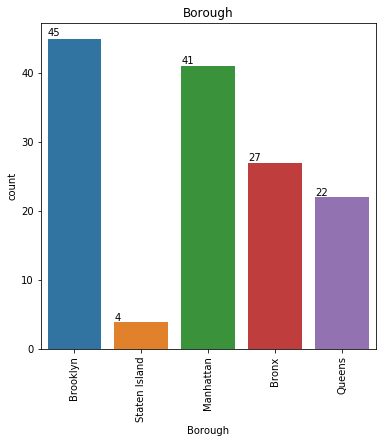

In [18]:
#Plot the number of markets for every Borough
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
sns.countplot(x='Borough', data = markets_NY)
ax.set_title('Borough')
for t in ax.patches:
    if(np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split('T')[0] for t in ax.get_xticklabels()])
        
plt.xticks(rotation=90)
plt.show()

#### Create a map using folium with the markets superimposed on top.

In [19]:
markets_NY_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, FacilityName, borough in zip(markets_NY['Latitude'],
                                           markets_NY['Longitude'], markets_NY['Market Name'], markets_NY['Borough']):
    label = '{}, {}'.format(FacilityName, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(markets_NY_map)

markets_NY_map

### Brooklyn and Manhattan have the most markets. Opening a restaurant in these two boroughs will ensure access to more options and simplify the logistics.

### Demographics 

#### The data is available no wikipedia (https://en.wikipedia.org/wiki/Demographics_of_New_York_City)

In [0]:
from bs4 import BeautifulSoup
import requests
import csv
import numpy as np
import pandas as pd
import lxml

source = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(source, "lxml")
table = soup.find('table',{'class':'wikitable sortable'})
#print(soup.prettify())

headers = ['Borough', 'County', 'Population', 'GDP($)', 'GDP(per capita)', 'square miles', 'square km', 'persons/sq. miles', 'person/sq. km.']

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)



In [21]:
# as seen from below the information stats from row 3
print(rows)
new_rows = rows[3:]

df_pop = pd.DataFrame(new_rows, columns = headers)
df_pop.head(10)

[[], [], [], ['The Bronx\n', '\n  Bronx\n', '1,471,160\n', '28.787\n', '19,570\n', '42.10\n', '109.04\n', '34,653\n', '13,231\n'], ['Brooklyn\n', '\n  Kings\n', '2,648,771\n', '63.303\n', '23,900\n', '70.82\n', '183.42\n', '37,137\n', '14,649\n'], ['Manhattan\n', '\n  New York\n', '1,664,727\n', '629.682\n', '378,250\n', '22.83\n', '59.13\n', '72,033\n', '27,826\n'], ['Queens\n', '\n   Queens\n', '2,358,582\n', '73.842\n', '31,310\n', '108.53\n', '281.09\n', '21,460\n', '8,354\n'], ['Staten Island\n', '\n   Richmond\n', '479,458\n', '11.249\n', '23,460\n', '58.37\n', '151.18\n', '8,112\n', '3,132\n'], ['City of New York', '8,622,698', '806.863', '93,574', '302.64', '783.83', '28,188', '10,947\n'], ['State of New York', '19,849,399', '1,547.116', '78,354', '47,214', '122,284', '416.4', '159\n'], ['Sources:[14] and see individual borough articles\n']]


Borough           County  \
0                                        The Bronx\n      \n  Bronx\n   
1                                         Brooklyn\n      \n  Kings\n   
2                                        Manhattan\n   \n  New York\n   
3                                           Queens\n    \n   Queens\n   
4                                    Staten Island\n  \n   Richmond\n   
5                                   City of New York        8,622,698   
6                                  State of New York       19,849,399   
7  Sources:[14] and see individual borough articl...             None   

    Population     GDP($) GDP(per capita) square miles square km  \
0  1,471,160\n   28.787\n        19,570\n      42.10\n  109.04\n   
1  2,648,771\n   63.303\n        23,900\n      70.82\n  183.42\n   
2  1,664,727\n  629.682\n       378,250\n      22.83\n   59.13\n   
3  2,358,582\n   73.842\n        31,310\n     108.53\n  281.09\n   
4    479,458\n   11.249\n        23,460\n      58.37\n  151.18\n   
5      806.863     93,574          302.64       783.83    28,188   
6    1,547.116     78,354          47,214      122,284     416.4   
7         None       None            None         None      None   

  persons/sq. miles person/sq. km.  
0          34,653\n       13,231\n  
1          37,137\n       14,649\n  
2          72,033\n       27,826\n  
3          21,460\n        8,354\n  
4           8,112\n        3,132\n  
5          10,947\n           None  
6             159\n           None  
7              None           None

In [22]:
#drop the last row
df_pop.drop(df_pop.index[7], inplace=True)
df_pop.head(10)

Borough           County   Population     GDP($) GDP(per capita)  \
0        The Bronx\n      \n  Bronx\n  1,471,160\n   28.787\n        19,570\n   
1         Brooklyn\n      \n  Kings\n  2,648,771\n   63.303\n        23,900\n   
2        Manhattan\n   \n  New York\n  1,664,727\n  629.682\n       378,250\n   
3           Queens\n    \n   Queens\n  2,358,582\n   73.842\n        31,310\n   
4    Staten Island\n  \n   Richmond\n    479,458\n   11.249\n        23,460\n   
5   City of New York        8,622,698      806.863     93,574          302.64   
6  State of New York       19,849,399    1,547.116     78,354          47,214   

  square miles square km persons/sq. miles person/sq. km.  
0      42.10\n  109.04\n          34,653\n       13,231\n  
1      70.82\n  183.42\n          37,137\n       14,649\n  
2      22.83\n   59.13\n          72,033\n       27,826\n  
3     108.53\n  281.09\n          21,460\n        8,354\n  
4      58.37\n  151.18\n           8,112\n        3,132\n  
5       783.83    28,188          10,947\n           None  
6      122,284     416.4             159\n           None

In [23]:
#shift the last two rows by one column
df_pop.loc[5:,['Borough', 'County','Population','GDP($)','GDP(per capita)','square miles','square km','persons/sq. miles','person/sq. km.']] =\
df_pop.loc[5:,['Borough', 'County','Population','GDP($)','GDP(per capita)','square miles','square km','persons/sq. miles','person/sq. km.']].shift(1,axis=1)
df_pop.head(10)

Borough             County   Population     GDP($) GDP(per capita)  \
0      The Bronx\n        \n  Bronx\n  1,471,160\n   28.787\n        19,570\n   
1       Brooklyn\n        \n  Kings\n  2,648,771\n   63.303\n        23,900\n   
2      Manhattan\n     \n  New York\n  1,664,727\n  629.682\n       378,250\n   
3         Queens\n      \n   Queens\n  2,358,582\n   73.842\n        31,310\n   
4  Staten Island\n    \n   Richmond\n    479,458\n   11.249\n        23,460\n   
5              NaN   City of New York    8,622,698    806.863          93,574   
6              NaN  State of New York   19,849,399  1,547.116          78,354   

  square miles square km persons/sq. miles person/sq. km.  
0      42.10\n  109.04\n          34,653\n       13,231\n  
1      70.82\n  183.42\n          37,137\n       14,649\n  
2      22.83\n   59.13\n          72,033\n       27,826\n  
3     108.53\n  281.09\n          21,460\n        8,354\n  
4      58.37\n  151.18\n           8,112\n        3,132\n  
5       302.64    783.83            28,188       10,947\n  
6       47,214   122,284             416.4          159\n

In [24]:
# Delete the newline sign '\n'.
df_pop['Borough'] = df_pop['Borough'].replace(to_replace='\n', value='', regex=True)
df_pop['County'] = df_pop['County'].replace(to_replace='\n', value='', regex=True)
df_pop['Population'] = df_pop['Population'].replace(to_replace='\n', value='', regex=True)
df_pop['GDP($)'] = df_pop['GDP($)'].replace(to_replace='\n', value='', regex=True)
df_pop['GDP(per capita)'] = df_pop['GDP(per capita)'].replace(to_replace='\n', value='', regex=True)
df_pop['square miles'] = df_pop['square miles'].replace(to_replace='\n', value='', regex=True)
df_pop['persons/sq. miles'] = df_pop['persons/sq. miles'].replace(to_replace='\n', value='', regex=True)
df_pop['square km'] = df_pop['square km'].replace(to_replace='\n', value='', regex=True)
df_pop['person/sq. km.'] = df_pop['person/sq. km.'].replace(to_replace='\n', value='', regex=True)

df_pop.head(8)

Borough             County  Population     GDP($) GDP(per capita)  \
0      The Bronx              Bronx   1,471,160     28.787          19,570   
1       Brooklyn              Kings   2,648,771     63.303          23,900   
2      Manhattan           New York   1,664,727    629.682         378,250   
3         Queens             Queens   2,358,582     73.842          31,310   
4  Staten Island           Richmond     479,458     11.249          23,460   
5            NaN   City of New York   8,622,698    806.863          93,574   
6            NaN  State of New York  19,849,399  1,547.116          78,354   

  square miles square km persons/sq. miles person/sq. km.  
0        42.10    109.04            34,653         13,231  
1        70.82    183.42            37,137         14,649  
2        22.83     59.13            72,033         27,826  
3       108.53    281.09            21,460          8,354  
4        58.37    151.18             8,112          3,132  
5       302.64    783.83            28,188         10,947  
6       47,214   122,284             416.4            159

In [25]:
#Delete 'Nan' Value
df_pop = df_pop.fillna('')
df_pop.head(10)

Borough             County  Population     GDP($) GDP(per capita)  \
0      The Bronx              Bronx   1,471,160     28.787          19,570   
1       Brooklyn              Kings   2,648,771     63.303          23,900   
2      Manhattan           New York   1,664,727    629.682         378,250   
3         Queens             Queens   2,358,582     73.842          31,310   
4  Staten Island           Richmond     479,458     11.249          23,460   
5                  City of New York   8,622,698    806.863          93,574   
6                 State of New York  19,849,399  1,547.116          78,354   

  square miles square km persons/sq. miles person/sq. km.  
0        42.10    109.04            34,653         13,231  
1        70.82    183.42            37,137         14,649  
2        22.83     59.13            72,033         27,826  
3       108.53    281.09            21,460          8,354  
4        58.37    151.18             8,112          3,132  
5       302.64    783.83            28,188         10,947  
6       47,214   122,284             416.4            159

#### From the wikipage https://en.wikipedia.org/wiki/New_York_City we can also get the racial composition of New York City

In [0]:
#Scraping the table
source2 = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup2 = BeautifulSoup(source2, 'lxml')
table2 = soup2.find('table', {'class': 'wikitable collapsible collapsed'})

headers2 = ['Racial composition', '2010', '1990', '1970', '1940']
table_rows = table2.find_all('tr')
rows = []
for row in table_rows:
    td = row.find_all('td')
    row = [row.text for row in td]
    rows.append(row)
# There are many tables woth this calss. The code above manages to scrape a table about the weather

In [0]:
#scraping all tables since the code above gets me the table with the weather data!

source2 = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup2 = BeautifulSoup(source2, 'lxml')
table2 = soup2.find_all('table', {'class': 'wikitable collapsible collapsed'})

### We are looking for the data in table[2] as seen from below

In [28]:
#The data we are looking for is in the second list. Every list is a table. 
table2[2]

<table class="wikitable collapsible collapsed" style="font-size: 90%;">
<tbody><tr>
<th>Racial composition</th>
<th>2010<sup class="reference" id="cite_ref-QuickFacts2010_272-1"><a href="#cite_note-QuickFacts2010-272">[270]</a></sup></th>
<th>1990<sup class="reference" id="cite_ref-pop_274-0"><a href="#cite_note-pop-274">[272]</a></sup></th>
<th>1970<sup class="reference" id="cite_ref-pop_274-1"><a href="#cite_note-pop-274">[272]</a></sup></th>
<th>1940<sup class="reference" id="cite_ref-pop_274-2"><a href="#cite_note-pop-274">[272]</a></sup>
</th></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/White_American" title="White American">White</a></td>
<td>44.0%</td>
<td>52.3%</td>
<td>76.6%</td>
<td>93.6%
</td></tr>
<tr>
<td>—<a href="/wiki/Non-Hispanic_whites" title="Non-Hispanic whites">Non-Hispanic</a></td>
<td>33.3%</td>
<td>43.2%</td>
<td>62.9%<sup class="reference" id="cite_ref-fifteen_275-0"><a href="#cite_note-fifteen-275">[273]</a></sup></td>
<td>92.0%
</td></tr>
<tr>
<td><a cla

In [0]:
# Scraping the table for the racial data 
headers2 = ['Racial composition', '2010', '1990', '1970', '1940']
table_rows = table2[2].find_all('tr')
rows = []
for row in table_rows:
    td = row.find_all('td')
    row = [row.text for row in td]
    rows.append(row)

In [30]:
print(rows)

[[], ['White', '44.0%', '52.3%', '76.6%', '93.6%\n'], ['—Non-Hispanic', '33.3%', '43.2%', '62.9%[273]', '92.0%\n'], ['Black or African American', '25.5%', '28.7%', '21.1%', '6.1%\n'], ['Hispanic or Latino (of any race)', '28.6%', '24.4%', '16.2%[273]', '1.6%\n'], ['Asian', '12.7%', '7.0%', '1.2%', '−\n']]


In [31]:
# As seen from the print ther data is in rows[1:] which will exclude first row
rows = rows[1:]
print(rows)

[['White', '44.0%', '52.3%', '76.6%', '93.6%\n'], ['—Non-Hispanic', '33.3%', '43.2%', '62.9%[273]', '92.0%\n'], ['Black or African American', '25.5%', '28.7%', '21.1%', '6.1%\n'], ['Hispanic or Latino (of any race)', '28.6%', '24.4%', '16.2%[273]', '1.6%\n'], ['Asian', '12.7%', '7.0%', '1.2%', '−\n']]


In [32]:
# Creating dataframe with the racial data
df_rac = pd.DataFrame(rows, columns = headers2)
df_rac.head(10)

Racial composition   2010   1990        1970     1940
0                             White  44.0%  52.3%       76.6%  93.6%\n
1                     —Non-Hispanic  33.3%  43.2%  62.9%[273]  92.0%\n
2         Black or African American  25.5%  28.7%       21.1%   6.1%\n
3  Hispanic or Latino (of any race)  28.6%  24.4%  16.2%[273]   1.6%\n
4                             Asian  12.7%   7.0%        1.2%      −\n

In [33]:
#clean the '\n' symbol and [248]
df_rac['1940'] = df_rac['1940'].replace(to_replace='\n', value = '', regex = True)
df_rac['1970'] = df_rac['1970'].str.rstrip('[248]')
df_rac.head()

Racial composition   2010   1990       1970   1940
0                             White  44.0%  52.3%      76.6%  93.6%
1                     —Non-Hispanic  33.3%  43.2%  62.9%[273  92.0%
2         Black or African American  25.5%  28.7%      21.1%   6.1%
3  Hispanic or Latino (of any race)  28.6%  24.4%  16.2%[273   1.6%
4                             Asian  12.7%   7.0%       1.2%      −

### Now lets look at New York Cuisite data

In [34]:
%matplotlib inline
!conda install -c conda-forge wordcloud==1.4.1 --yes
import matplotlib as mpl
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
mpl.style.use('ggplot') # optional: for ggplot-like style

/bin/bash: conda: command not found


#### We can scrape the data from the following wikipage:https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [0]:
#Scraping the data
source = requests.get('https://en.wikipedia.org/wiki/Cuisine_of_New_York_City')
soup = BeautifulSoup(source.content,'html.parser')
l = []
for rest in soup.find_all('div', {'class':'div-col columns column-width'}):
    for li in rest.find_all('li'):
        cui = li.text.split('–')
        l.append(cui)
l = l[:52]

In [0]:
#Creating a list of the Boroughs as given in the wikipage
bor = [ 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Queen', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens',
 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Brooklyn',  'Brooklyn', 'Brooklyn',
 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn',
 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn',
 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan',
 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan']

In [37]:
#Creating the dataframe
df1 = pd.DataFrame(l, columns = ['Neighborhood', 'Cuisine'])
df1.head()

Neighborhood                                            Cuisine
0  Bedford Park    Mexican, Puerto Rican, Dominican, Korean (on ...
1       Belmont    Italian, Albanian (also known as "Arthur Aven...
2   City Island                                    Italian, Seafood
3   Morris Park                                   Italian, Albanian
4       Norwood            Filipino (formerly Irish, less so today)

In [38]:
#Adding borough column
df1['Borough'] = bor
df1.head()

Neighborhood                                            Cuisine Borough
0  Bedford Park    Mexican, Puerto Rican, Dominican, Korean (on ...   Bronx
1       Belmont    Italian, Albanian (also known as "Arthur Aven...   Bronx
2   City Island                                    Italian, Seafood   Bronx
3   Morris Park                                   Italian, Albanian   Bronx
4       Norwood            Filipino (formerly Irish, less so today)   Bronx

In [39]:
#rearranging the columns
df_cuisine = df1[['Borough', 'Neighborhood', 'Cuisine']]
df_cuisine.head()

Borough   Neighborhood                                            Cuisine
0   Bronx  Bedford Park    Mexican, Puerto Rican, Dominican, Korean (on ...
1   Bronx       Belmont    Italian, Albanian (also known as "Arthur Aven...
2   Bronx   City Island                                    Italian, Seafood
3   Bronx   Morris Park                                   Italian, Albanian
4   Bronx       Norwood            Filipino (formerly Irish, less so today)

#### Analyze the gathered data using word cloud

In [40]:
cui_wc = df_cuisine[['Cuisine']]
cui_wc

Cuisine
0    Mexican, Puerto Rican, Dominican, Korean (on ...
1    Italian, Albanian (also known as "Arthur Aven...
2                                    Italian, Seafood
3                                   Italian, Albanian
4            Filipino (formerly Irish, less so today)
5                                              Jewish
6                             Puerto Rican, Dominican
7                               Jamaican, West Indian
8                                               Irish
9    Greek, Italian, Eastern European, Brazilian, ...
10                               Indian and Pakistani
11                                 Chinese and Korean
12                          Jewish, Russian and Uzbek
13                                            Italian
14                                  German and Polish
15   Indian, Pakistani, Bangladeshi, Colombian, Ec...
16   Bangladeshi, Caribbean; African-American; Afr...
17                         Arab, Chinese, and Italian
18   Indian, Guyanese, West Indian, Pakistani, Ban...
19                                               None
20                Irish, Dominican, Mexican, Guyanese
21        Filipino, Irish, Mexican, Tibetan, Romanian
22   Irish, Italian, Greek, Turkish, Lebanese, Pal...
23   African-American, Jamaican, Trinidadian, Puer...
24   Italian, Chinese, Turkish, Russian, Mexican, ...
25                  Jewish, Italian, Mexican, Chinese
26   Russian, Georgian, Turkish, Pakistani and Ukr...
27   Puerto Rican, Mexican, Dominican, and Ecuadorian
28            Jamaican, West Indian, African-American
29                                            Italian
30                  Jamaican, West Indian, and Jewish
31      African-American, Dominican, and Puerto Rican
32                      Jamaican, Haitian, and Creole
33                               Polish and Ukrainian
34     Bengali, Pakistani, Mexican, Uzbek, and Polish
35            Jewish, Italian, Russian, and Pakistani
36   Italian, Irish, French, and Puerto Rican (for...
37        Puerto Rican, African-American, and Italian
38             Seafood, Chinese, Russian, and Italian
39   Puerto Rican, Chinese, Arab, Mexican and Italian
40        Italian, Jewish, Dominican and Puerto Rican
41                             Chinese and Vietnamese
42   Puerto Rican, Mexican, Dominican, Chinese-Cub...
43             Japanese, Korean, Indian and Ukrainian
44                         Italian and Middle Eastern
45   Italian, African-American, Latin American, We...
46                                             Korean
47                                         Australian
48                                            Italian
49   Puerto Rican, Jewish, Italian, and Latin Amer...
50                  Indian, Pakistani and Bangladeshi
51                                               None

In [0]:
cui_wc.to_csv('cui_wc.txt', sep=',', index = False)
cui_wc1 = open('cui_wc.txt', 'r').read()
stopwords = set(STOPWORDS)

In [42]:
#instantiate cloud object
ny_cuisine = WordCloud(
    background_color = 'white',
    max_words=2000,
    stopwords = stopwords)
ny_cuisine.generate(cui_wc1)

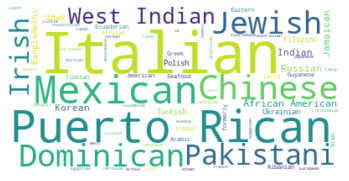

<Figure size 2160x3240 with 0 Axes>

In [43]:
#visualizing the cloud
plt.imshow(ny_cuisine, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)
plt.show()

## Use the Foursquare API to explore neighborhoods in Brooklyn and Manhattan.

In [44]:
#At the beggining we created a dataframe containing borough, neighborhoods and coodrinates.
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [45]:
neighborhoods['Borough'].value_counts().to_frame()

Borough
Queens              81
Brooklyn            70
Staten Island       63
Bronx               52
Manhattan           40

In [46]:
neigh_MB = neighborhoods.loc[(neighborhoods['Borough'] == 'Brooklyn')|(neighborhoods['Borough'] == 'Manhattan')]
neigh_MB = neigh_MB.reset_index(drop=True)
neigh_MB.head()

Borough Neighborhood   Latitude  Longitude
0  Manhattan  Marble Hill  40.876551 -73.910660
1   Brooklyn    Bay Ridge  40.625801 -74.030621
2   Brooklyn  Bensonhurst  40.611009 -73.995180
3   Brooklyn  Sunset Park  40.645103 -74.010316
4   Brooklyn   Greenpoint  40.730201 -73.954241

In [47]:
neigh_MB['Borough'].value_counts().to_frame()

Borough
Brooklyn        70
Manhattan       40

In [0]:
#get the coordinates of New York City by using the code below. Since it doesn't work all the time better to assign the coordinates to a variables directly
#address = 'New York City, NY'

#geolocator = Nominatim(user_agent="myapp")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))
latitude = 40.7127281
longitude = -74.0060152


In [49]:
#Visualize Brooklyn and Manhattan using Folium

# create map of New York using latitude and longitude values
MB_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neigh_MB['Latitude'], neigh_MB['Longitude'], neigh_MB['Borough'], neigh_MB['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(MB_map)  
    
MB_map

In [0]:
# Foursquare credentials
# @hidden_cell


CLIENT_ID = '11ZOVKWICYLRBLQOW5OMUFDPBHOCYKTKIHZWEVVAGUJI13LT' # your Foursquare ID
CLIENT_SECRET = 'XWN0QJPSLNPH20N1JWJHP3LQNTXCCHNJEZIHAYWDDXNU1UGG' # your Foursquare Secret
VERSION = '20190312'

#### Analyze each neighborhoodin Manhattan and Brooklyn

In [0]:
# Define a function that returns nearby 200 venues in 1000 radius
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, RADIUS=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [52]:
MB_venues = getNearbyVenues(names=neigh_MB['Neighborhood'],
                                  latitudes=neigh_MB['Latitude'],
                                  longitudes=neigh_MB['Longitude'],
                                  LIMIT=200)

print('The "BM_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(MB_venues['Venue Category']),
      len(MB_venues['Venue Category'].unique())))


MB_venues.head()

Marble Hill
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho

Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066    Bikram Yoga   
1  Marble Hill              40.876551               -73.91066       Arturo's   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066    Sam's Pizza   
4  Marble Hill              40.876551               -73.91066      Starbucks   

   Venue Latitude  Venue Longitude Venue Category  
0       40.876844       -73.906204    Yoga Studio  
1       40.874412       -73.910271    Pizza Place  
2       40.880404       -73.908937          Diner  
3       40.879435       -73.905859    Pizza Place  
4       40.877531       -73.905582    Coffee Shop

In [53]:
MB_venues.shape

(9685, 7)

## Methodology <a name="methodology"></a>

In the first step we collected data about New York City:
1. Demographics data.
2. Boroughs, neighborhoods, and preffered food.
3. Available markets for supplies.
4. determinied that the preferred food in the city is Italian.

Second step is to analyze the collected data and define:
1. Use foursquare API to fetch the number of restaurants in Manhattan and Brooklyn boroughs.
2. The market saturation for restaurant business for Manhattan and Brooklyn boroughs. 
3. Confirm that the preferred food is Italian (since it is for the whole city).
4. Use Kmeans to cluster the restaurants.
4. Pinpoint the most appropriate neighborhood or area to open a traditional Balkan food restaurant.

## Analysis <a name="analysis"></a>

### Analyze the gathered data

#### Using word cloud analyze the preferred data in Manhattan

In [54]:
mh_data = df_cuisine[df_cuisine['Borough'] == 'Manhattan'].reset_index(drop=True)
mh_cuisine_wc = mh_data[['Cuisine']]
mh_cuisine_wc

Cuisine
0                              Chinese and Vietnamese
1    Puerto Rican, Mexican, Dominican, Chinese-Cub...
2              Japanese, Korean, Indian and Ukrainian
3                          Italian and Middle Eastern
4    Italian, African-American, Latin American, We...
5                                              Korean
6                                          Australian
7                                             Italian
8    Puerto Rican, Jewish, Italian, and Latin Amer...
9                   Indian, Pakistani and Bangladeshi
10                                               None

In [0]:
mh_cuisine_wc.to_csv('mh_cuisine.txt', sep=',', index=False)
mh_cuisine_file = open('mh_cuisine.txt', 'r').read()
stopwords = set(STOPWORDS)

In [56]:
#instantiate cloud object
mh_obj = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords)
mh_obj.generate(mh_cuisine_file)

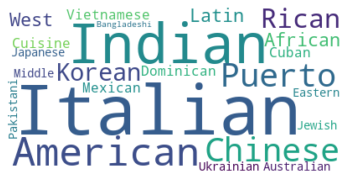

<Figure size 2160x3240 with 0 Axes>

In [57]:
#visualize
plt.imshow(mh_obj, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)
plt.show()

#### Using word cloud analyze the preferred data in Brooklyn

In [58]:
br_data = df_cuisine[df_cuisine['Borough'] == 'Brooklyn'].reset_index(drop=True)
br_cuisine = br_data[['Cuisine']]
br_cuisine

Cuisine
0    Irish, Italian, Greek, Turkish, Lebanese, Pal...
1    African-American, Jamaican, Trinidadian, Puer...
2    Italian, Chinese, Turkish, Russian, Mexican, ...
3                   Jewish, Italian, Mexican, Chinese
4    Russian, Georgian, Turkish, Pakistani and Ukr...
5    Puerto Rican, Mexican, Dominican, and Ecuadorian
6             Jamaican, West Indian, African-American
7                                             Italian
8                   Jamaican, West Indian, and Jewish
9       African-American, Dominican, and Puerto Rican
10                      Jamaican, Haitian, and Creole
11                               Polish and Ukrainian
12     Bengali, Pakistani, Mexican, Uzbek, and Polish
13            Jewish, Italian, Russian, and Pakistani
14   Italian, Irish, French, and Puerto Rican (for...
15        Puerto Rican, African-American, and Italian
16             Seafood, Chinese, Russian, and Italian
17   Puerto Rican, Chinese, Arab, Mexican and Italian
18        Italian, Jewish, Dominican and Puerto Rican

In [59]:
br_cuisine.to_csv('br_cuisine.txt', sep = ',', index=False)
br_wc = open('br_cuisine.txt', 'r').read()
stopwords = set(STOPWORDS)
br_cuisine_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stopwords)

br_cuisine_wc.generate(br_wc)

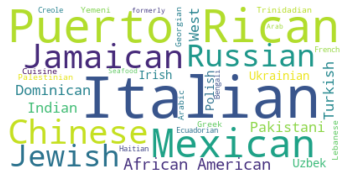

<Figure size 2160x3240 with 0 Axes>

In [60]:
# display the word cloud
plt.imshow(br_cuisine_wc, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most preffered food in both boroughs is Italian. Opening a Bulgarian traditional food restaurant in these areas won't have much competition in turms of type of food.

#### Further analyze Manhattan and Brooklyn neighborhoods

In [61]:
MB_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066    Bikram Yoga   
1  Marble Hill              40.876551               -73.91066       Arturo's   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066    Sam's Pizza   
4  Marble Hill              40.876551               -73.91066      Starbucks   

   Venue Latitude  Venue Longitude Venue Category  
0       40.876844       -73.906204    Yoga Studio  
1       40.874412       -73.910271    Pizza Place  
2       40.880404       -73.908937          Diner  
3       40.879435       -73.905859    Pizza Place  
4       40.877531       -73.905582    Coffee Shop

In [62]:
MB_venues.shape

(9685, 7)

In [63]:

colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
MB_venues = MB_venues[colnames]
MB_venues.columns = MB_venues.columns.str.replace(' ', '')
MB_venues.head()

Neighborhood  NeighborhoodLatitude  NeighborhoodLongitude          Venue  \
0  Marble Hill             40.876551              -73.91066    Bikram Yoga   
1  Marble Hill             40.876551              -73.91066       Arturo's   
2  Marble Hill             40.876551              -73.91066  Tibbett Diner   
3  Marble Hill             40.876551              -73.91066    Sam's Pizza   
4  Marble Hill             40.876551              -73.91066      Starbucks   

   VenueLatitude  VenueLongitude VenueCategory  
0      40.876844      -73.906204   Yoga Studio  
1      40.874412      -73.910271   Pizza Place  
2      40.880404      -73.908937         Diner  
3      40.879435      -73.905859   Pizza Place  
4      40.877531      -73.905582   Coffee Shop

In [0]:
# Get only the restaurants
MB_venues_rest = MB_venues[MB_venues['VenueCategory'].str.contains('Restaurant')]

In [0]:
MB_venues_rest

In [0]:
# Visualize restaurants
Rest_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to the map with restaurant name and type of restaurant
for lat, lng, venue, venueCat in zip(MB_venues_rest['VenueLatitude'], MB_venues_rest['VenueLongitude'], MB_venues_rest['Venue'], MB_venues_rest['VenueCategory']):
    label = '{}, {}'.format(venue, venueCat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Rest_map)  
    
Rest_map


In [130]:
from folium import plugins
Rest_map2 = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
restaurants = plugins.MarkerCluster().add_to(Rest_map2)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, venue, venueCat in zip(MB_venues_rest['VenueLatitude'], MB_venues_rest['VenueLongitude'], MB_venues_rest['Venue'], MB_venues_rest['VenueCategory']):
    label = '{}, {}'.format(venue, venueCat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(restaurants)  
    
Rest_map2

In [64]:
#Create a list of venues with the number of places for every type
MB_venues.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)

VenueCategory
Pizza Place                                 382
Coffee Shop                                 338
Italian Restaurant                          242
Bakery                                      221
Bar                                         205
Café                                        204
Park                                        197
American Restaurant                         177
Grocery Store                               168
Ice Cream Shop                              154
Sandwich Place                              153
Mexican Restaurant                          148
Caribbean Restaurant                        146
Chinese Restaurant                          145
Deli / Bodega                               139
Gym / Fitness Center                        138
Gym                                         137
Cocktail Bar                                136
Wine Shop                                   132
Donut Shop                                  121
Japanese Restaurant       

In [0]:
MB_onehot = pd.get_dummies(MB_venues[['VenueCategory']], prefix="", prefix_sep="")

### Analyze each neighborhoods

In [68]:
# one hot encoding
MB_onehot = pd.get_dummies(MB_venues[['VenueCategory']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(MB_onehot.columns)

# add neighborhood column back to dataframe
MB_onehot['Neighborhood'] = MB_venues['Neighborhood'] 

# move neighborhood column to the first column
MB_onehot = MB_onehot[column_names]

MB_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  African Restaurant  \
0  Marble Hill                  0               0                   0   
1  Marble Hill                  0               0                   0   
2  Marble Hill                  0               0                   0   
3  Marble Hill                  0               0                   0   
4  Marble Hill                  0               0                   0   

   American Restaurant  Animal Shelter  Antique Shop  Aquarium  Arcade  \
0                    0               0             0         0       0   
1                    0               0             0         0       0   
2                    0               0             0         0       0   
3                    0               0             0         0       0   
4                    0               0             0         0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Garage  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0            0          0           0           0       0     0    0   
1            0          0           0           0       0     0    0   
2            0          0           0           0       0     0    0   
3            0          0           0           0       0     0    0   
4            0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0               0                 0                 0                   0   
1               0                 0                 0                   0   
2               0                 0                 0                   0   
3               0                 0                 0                   0   
4               0                 0                 0                   0   

   Bath House  Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0           0      0                0         0            0           0   
1           0      0                0         0            0           0   
2           0      0                0         0            0           0   
3           0      0                0         0            0           0   
4           0      0                0         0            0           0   

   Big Box Store  Bike Shop  Bike Trail  Bistro  Board Shop  Boat or Ferry  \
0              0          0           0       0           0              0   
1              0          0           0       0           0              0   
2              0          0           0       0           0              0   
3              0          0           0       0           0              0   
4              0          0           0       0           

#### Filter only restaurant data

In [0]:
restaurant_List = []
search = 'Restaurant'
for i in MB_onehot.columns :
    if search in i:
        restaurant_List.append(i)

In [70]:
restaurant_List

['African Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Austrian Restaurant',
 'Brazilian Restaurant',
 'Burmese Restaurant',
 'Cajun / Creole Restaurant',
 'Cambodian Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Czech Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Empanada Restaurant',
 'English Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 'Hotpot Restaurant',
 'Indian Restaurant',
 'Israeli Restaurant',
 'Italian Restaurant',
 'Japanese Curry Restaurant',
 'Japanese Restaurant',
 'Jewish Restaurant',
 'Kebab Restaurant',
 'Korean Restauran

In [0]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List
MB_restaurant = MB_onehot[col_name]
MB_restaurant = MB_restaurant.iloc[:,1::]

In [0]:
MB_restaurant_grouped = MB_restaurant.groupby('Neighborhood').sum().reset_index()


In [73]:
MB_restaurant_grouped

Neighborhood  African Restaurant  American Restaurant  \
0                   Bath Beach                   0                    1   
1            Battery Park City                   0                    2   
2                    Bay Ridge                   0                    3   
3           Bedford Stuyvesant                   0                    0   
4                  Bensonhurst                   0                    1   
5                 Bergen Beach                   0                    1   
6                  Boerum Hill                   0                    0   
7                 Borough Park                   0                    1   
8               Brighton Beach                   0                    0   
9            Broadway Junction                   0                    0   
10            Brooklyn Heights                   0                    3   
11                 Brownsville                   0                    1   
12                    Bushwick                   0                    1   
13                    Canarsie                   0                    0   
14               Carnegie Hill                   0                    2   
15             Carroll Gardens                   0                    1   
16              Central Harlem                   4                    3   
17                     Chelsea                   0                    3   
18                   Chinatown                   0                    1   
19                   City Line                   0                    0   
20                Civic Center                   0                    4   
21                     Clinton                   0                    4   
22                Clinton Hill                   0                    0   
23                 Cobble Hill                   0                    1   
24                Coney Island                   0                    0   
25               Crown Heights                   1                    0   
26               Cypress Hills                   0                    0   
27                 Ditmas Park                   0                    0   
28                    Downtown                   0                    1   
29                       Dumbo                   0                    5   
30               Dyker Heights                   0                    1   
31               East Flatbush                   0                    0   
32                 East Harlem                   1                    2   
33               East New York                   0                    0   
34                East Village                   0                    1   
35           East Williamsburg                   0                    0   
36                     Erasmus                   0                    0   
37          Financial District                   0                    5   
38                    Flatbush                   0                    0   
39                    Flatiron                   0                    4   
40                   Flatlands                   0                    1   
41                 Fort Greene                   0                    1   
42               Fort Hamilton                   0                    1   
43                Fulton Ferry                   0                    6   
44                  Georgetown                   0                    3   
45             Gerritsen Beach                   0                    1   
46                     Gowanus                   0                    1   
47                    Gramercy                   0                    6   
48                   Gravesend                   0                    0   
49                  Greenpoint                   0                    1   
50           Greenwich Village                   0                    2   
51            Hamilton Heights                   1                    3   
52               Highland Park             

In [75]:
MB_restaurant_grouped['Total'] = MB_restaurant_grouped .sum(axis=1)
MB_restaurant_grouped.head()

Neighborhood  African Restaurant  American Restaurant  \
0          Bath Beach                   0                    1   
1   Battery Park City                   0                    2   
2           Bay Ridge                   0                    3   
3  Bedford Stuyvesant                   0                    0   
4         Bensonhurst                   0                    1   

   Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
0                 0                       0                 2   
1                 0                       0                 0   
2                 0                       0                 1   
3                 1                       0                 0   
4                 0                       0                 1   

   Australian Restaurant  Austrian Restaurant  Brazilian Restaurant  \
0                      0                    0                     0   
1                      0                    0                     0   
2                      0                    0                     0   
3                      0                    0                     0   
4                      0                    0                     0   

   Burmese Restaurant  Cajun / Creole Restaurant  Cambodian Restaurant  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   Cantonese Restaurant  Caribbean Restaurant  Caucasian Restaurant  \
0                     4                     0                     0   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     4                     0   
4                     3                     0                     0   

   Chinese Restaurant  Colombian Restaurant  Comfort Food Restaurant  \
0                   6                     0                        0   
1                   0                     0                        0   
2                   3                     0                        0   
3                   3                     0                        1   
4                   4                     0                        0   

   Cuban Restaurant  Czech Restaurant  Dim Sum Restaurant  \
0                 0                 0                   0   
1                 0                 0                   0   
2                 0                 0                   0   
3                 0                 0                   0   
4                 0                 0                   1   

   Dumpling Restaurant  Eastern European Restaurant  Empanada Restaurant  \
0                    0                            1                    0   
1                    0                            0                    0   
2                    0                            0                    0   
3                    0                            0                    0   
4                    0                            1                    0   

   English Restaurant  Ethiopian Restaurant  Falafel Restaurant  \
0                   0                     0                   0   
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     0                   0   
4                   0                     0                   0   

   Fast Food Restaurant  Filipino Restaurant  French Restaurant  \
0                     2                    0                  0   
1                     0                    0                  1   
2                     0                    0                 

### Use kmeans to cluster neighborhoods and examine data.

In [89]:
# set number of clusters
kclusters = 3

MB_grouped_clustering = MB_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(MB_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0,
       0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0,
       2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1],
      dtype=int32)

In [0]:
MB_grouped_clustering

In [110]:
# set number of clusters
kclusters = 4

MB_grouped_clustering = MB_restaurant_grouped.drop(['Neighborhood', 'Total'], 1)

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters, n_init = 60, random_state=0).fit(MB_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 1, 3, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 2, 3, 2, 1, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 3, 2, 3, 0, 0, 2,
       2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2,
       3, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 3, 0, 2, 0, 3, 0],
      dtype=int32)

In [114]:
MB_results = pd.DataFrame(kmeans.cluster_centers_)
MB_results.columns = MB_grouped_clustering.columns
MB_results.index = ['cluster0','cluster1','cluster2','cluster4']
MB_results['Total Sum'] = MB_results.sum(axis = 1)
MB_results

African Restaurant  American Restaurant  Arepa Restaurant  \
cluster0       -1.387779e-17             2.241379     -1.387779e-17   
cluster1        1.818182e-01             1.454545      2.727273e-01   
cluster2        9.090909e-02             1.672727      7.272727e-02   
cluster4        6.666667e-02             0.266667      6.666667e-02   

          Argentinian Restaurant  Asian Restaurant  Australian Restaurant  \
cluster0            1.034483e-01          0.655172           2.068966e-01   
cluster1            9.090909e-02          0.545455           1.387779e-17   
cluster2            5.454545e-02          0.272727           9.090909e-02   
cluster4            1.387779e-17          0.200000          -1.387779e-17   

          Austrian Restaurant  Brazilian Restaurant  Burmese Restaurant  \
cluster0             0.068966         -3.469447e-18       -1.734723e-18   
cluster1             0.090909         -3.469447e-18       -1.734723e-18   
cluster2             0.054545          3.636364e-02        1.818182e-02   
cluster4             0.066667         -3.469447e-18       -1.734723e-18   

          Cajun / Creole Restaurant  Cambodian Restaurant  \
cluster0               1.034483e-01          6.896552e-02   
cluster1              -1.387779e-17         -6.938894e-18   
cluster2               3.636364e-02          1.818182e-02   
cluster4               6.666667e-02         -6.938894e-18   

          Cantonese Restaurant  Caribbean Restaurant  Caucasian Restaurant  \
cluster0         -2.775558e-17              0.172414          6.896552e-02   
cluster1          1.387779e-17              1.181818         -6.938894e-18   
cluster2          1.272727e-01              0.381818          5.454545e-02   
cluster4          1.387779e-17              7.133333          6.938894e-18   

          Chinese Restaurant  Colombian Restaurant  Comfort Food Restaurant  \
cluster0            0.896552         -1.734723e-18                 0.068966   
cluster1            1.818182         -1.734723e-18                 0.090909   
cluster2            1.363636          1.818182e-02                 0.018182   
cluster4            1.600000         -1.734723e-18                 0.133333   

          Cuban Restaurant  Czech Restaurant  Dim Sum Restaurant  \
cluster0      1.724138e-01      3.448276e-02       -1.734723e-18   
cluster1      5.454545e-01     -3.469447e-18       -1.734723e-18   
cluster2      2.181818e-01      1.818182e-02        1.818182e-02   
cluster4      5.551115e-17     -3.469447e-18       -1.734723e-18   

          Dumpling Restaurant  Eastern European Restaurant  \
cluster0         1.034483e-01                 1.379310e-01   
cluster1         2.727273e-01                 9.090909e-02   
cluster2         1.818182e-02                 1.636364e-01   
cluster4         1.387779e-17                 2.775558e-17   

          Empanada Restaurant  English Restaurant  Ethiopian Restaurant  \
cluster0         2.081668e-17        3.448276e-02          1.034483e-01   
cluster1         1.818182e-01       -3.469447e-18          5.454545e-01   
cluster2         3.636364e-02        1.818182e-02          1.818182e-02   
cluster4         6.666667e-02       -3.469447e-18          1.387779e-17   

          Falafel Restaurant  Fast Food Restaurant  Filipino Restaurant  \
cluster0            0.275862              0.068966             0.103448   
cluster1            0.090909              0.272727             0.090909   
cluster2            0.127273              0.781818             0.036364   
cluster4            0.066667              1.866667             0.133333   

          French Restaurant  German Restaurant  Greek Restaurant  \
cluster0           1.793103       1.724138e-01      7.586207e-01   
cluster1           0.454545      -1.387779e-17      9.090909e-02   
cluster2           0.363636       9.090909e-02      2.181818e-01   
cluster4           0.133333       1.387779e-17     -5.551115e-17   

          Halal Restaurant  Hawaiian Restaurant  Hotpo

The total Sum of cluster2 has the smallest value. That means that the market is not oversaturated.

#### Create a dataframe with Neighborhoods, Cluster and Total sum.

In [0]:
MB_results_merged = pd.DataFrame(MB_restaurant_grouped['Neighborhood'])

MB_results_merged['Total'] = MB_restaurant_grouped['Total']
MB_results_merged = MB_results_merged.assign(Cluster_Labels = kmeans.labels_)

In [116]:
MB_results_merged.head(10)

Neighborhood  Total  Cluster_Labels
0          Bath Beach     66               2
1   Battery Park City     16               2
2           Bay Ridge     70               0
3  Bedford Stuyvesant     46               3
4         Bensonhurst     58               2
5        Bergen Beach      8               2
6         Boerum Hill     32               2
7        Borough Park      8               2
8      Brighton Beach     44               2
9   Broadway Junction     16               2

In [117]:
MB_merged = neigh_MB
MB_merged = MB_merged.join(MB_results_merged.set_index('Neighborhood'), on='Neighborhood')
MB_merged.head(10)

Borough       Neighborhood   Latitude  Longitude  Total  Cluster_Labels
0  Manhattan        Marble Hill  40.876551 -73.910660     28               1
1   Brooklyn          Bay Ridge  40.625801 -74.030621     70               0
2   Brooklyn        Bensonhurst  40.611009 -73.995180     58               2
3   Brooklyn        Sunset Park  40.645103 -74.010316     76               1
4   Brooklyn         Greenpoint  40.730201 -73.954241     36               2
5   Brooklyn          Gravesend  40.595260 -73.973471     18               2
6   Brooklyn     Brighton Beach  40.576825 -73.965094     44               2
7   Brooklyn     Sheepshead Bay  40.586890 -73.943186     60               0
8   Brooklyn  Manhattan Terrace  40.614433 -73.957438     36               2
9   Brooklyn           Flatbush  40.636326 -73.958401     66               3

#### Visualize the resulting clusters

In [118]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(MB_merged['Latitude'], MB_merged['Longitude'], MB_merged['Neighborhood'], MB_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Finally make a list of the neighborhoods of the three clusters

In [83]:
#Cluster 0
MB_merged[MB_merged['Cluster_Labels'] == 0].reset_index(drop=True)

Borough        Neighborhood   Latitude  Longitude  Total  Cluster_Labels
0    Brooklyn          Greenpoint  40.730201 -73.954241     36               0
1    Brooklyn      Brighton Beach  40.576825 -73.965094     44               0
2    Brooklyn   Manhattan Terrace  40.614433 -73.957438     36               0
3    Brooklyn       Crown Heights  40.670829 -73.943291     46               0
4    Brooklyn          Kensington  40.642382 -73.980421     42               0
5    Brooklyn     Windsor Terrace  40.656946 -73.980073     40               0
6    Brooklyn        Williamsburg  40.707144 -73.958115     50               0
7    Brooklyn            Bushwick  40.698116 -73.925258     52               0
8    Brooklyn  Bedford Stuyvesant  40.687232 -73.941785     46               0
9    Brooklyn    Brooklyn Heights  40.695864 -73.993782     42               0
10   Brooklyn         Cobble Hill  40.687920 -73.998561     46               0
11   Brooklyn     Carroll Gardens  40.680540 -73.994654     40               0
12   Brooklyn             Gowanus  40.673931 -73.994441     42               0
13   Brooklyn          Park Slope  40.672321 -73.977050     46               0
14   Brooklyn     Manhattan Beach  40.577914 -73.943537     46               0
15   Brooklyn       Dyker Heights  40.619219 -74.019314     44               0
16   Brooklyn            Downtown  40.690844 -73.983463     42               0
17   Brooklyn         Boerum Hill  40.685683 -73.983748     32               0
18   Brooklyn           City Line  40.678570 -73.867976     34               0
19   Brooklyn          Georgetown  40.623845 -73.916075     36               0
20   Brooklyn   East Williamsburg  40.708492 -73.938858     40               0
21   Brooklyn          North Side  40.714823 -73.958809     48               0
22   Brooklyn       Ocean Parkway  40.613060 -73.968367     48               0
23   Brooklyn       Fort Hamilton  40.614768 -74.031979     54               0
24  Manhattan           Chinatown  40.715618 -73.994279     52               0
25  Manhattan     Upper East Side  40.775639 -73.960508     50               0
26  Manhattan    Roosevelt Island  40.762160 -73.949168     50               0
27  Manhattan      Lincoln Square  40.773529 -73.985338     32               0
28  Manhattan             Clinton  40.759101 -73.996119     38               0
29  Manhattan             Midtown  40.754691 -73.981669     44               0
30  Manhattan             Chelsea  40.744035 -74.003116     46               0
31  Manhattan             Tribeca  40.721522 -74.010683     50               0
32  Manhattan        Little Italy  40.719324 -73.997305     46               0
33  Manhattan                Soho  40.722184 -74.000657     52               0
34  Manhattan  Financial District  40.707107 -74.010665     40               0
35   Brooklyn             Wingate  40.660947 -73.937187     36               0
36  Manhattan       Carnegie Hill  40.782683 -73.953256     40               0
37  Manhattan        Civic Center  40.715229 -74.005415     50               0
38   Brooklyn      Remsen Village  40.652117 -73.916653     38               0
39   Brooklyn          Mill Basin  40.615974 -73.915154     32               0
40  Manhattan     Stuyvesant Town  40.731000 -73.974052     48               0
41  Manhattan            Flatiron  40.739673 -73.990947     54               0
42   Brooklyn        Fulton Ferry  40.703281 -73.995508     38               0
43   Brooklyn          Weeksville  40.675040 -73.930531     50               0
44   Brooklyn               Dumbo  40.703176 -73.988753     32               0
45   Brooklyn           Homecrest  40.598525 -73.959185     52               0
46   Brooklyn             Erasmus  40.646926 -73.948177     42               0
47  Manhattan        Hudson Yards  40.756658 -74.000111     36               0

In [84]:
#Cluster 1
MB_merged[MB_merged['Cluster_Labels'] == 1].reset_index(drop=True)

Borough               Neighborhood   Latitude  Longitude  Total  \
0    Brooklyn                  Bay Ridge  40.625801 -74.030621     70   
1    Brooklyn                Bensonhurst  40.611009 -73.995180     58   
2    Brooklyn                Sunset Park  40.645103 -74.010316     76   
3    Brooklyn             Sheepshead Bay  40.586890 -73.943186     60   
4    Brooklyn                   Flatbush  40.636326 -73.958401     66   
5    Brooklyn           Prospect Heights  40.676822 -73.964859     60   
6    Brooklyn                Fort Greene  40.688527 -73.972906     56   
7    Brooklyn                 Bath Beach  40.599519 -73.998752     66   
8    Brooklyn               Clinton Hill  40.693229 -73.967843     68   
9    Brooklyn  Prospect Lefferts Gardens  40.658420 -73.954899     66   
10   Brooklyn        Prospect Park South  40.647009 -73.962613     70   
11   Brooklyn                 South Side  40.710861 -73.958001     56   
12  Manhattan         Washington Heights  40.851903 -73.936900     64   
13  Manhattan                     Inwood  40.867684 -73.921210     68   
14  Manhattan           Hamilton Heights  40.823604 -73.949688     66   
15  Manhattan             Manhattanville  40.816934 -73.957385     62   
16  Manhattan             Central Harlem  40.815976 -73.943211     72   
17  Manhattan                East Harlem  40.792249 -73.944182     62   
18  Manhattan                  Yorkville  40.775930 -73.947118     58   
19  Manhattan                 Lenox Hill  40.768113 -73.958860     62   
20  Manhattan            Upper West Side  40.787658 -73.977059     64   
21  Manhattan                Murray Hill  40.748303 -73.978332     66   
22  Manhattan          Greenwich Village  40.726933 -73.999914     56   
23  Manhattan               East Village  40.727847 -73.982226     66   
24  Manhattan            Lower East Side  40.717807 -73.980890     58   
25  Manhattan               West Village  40.734434 -74.006180     62   
26  Manhattan           Manhattan Valley  40.797307 -73.964286     62   
27  Manhattan        Morningside Heights  40.808000 -73.963896     66   
28  Manhattan                   Gramercy  40.737210 -73.981376     82   
29   Brooklyn                Ditmas Park  40.643675 -73.961013     66   
30  Manhattan                       Noho  40.723259 -73.988434     78   
31  Manhattan              Midtown South  40.748510 -73.988713     64   
32  Manhattan               Sutton Place  40.760280 -73.963556     62   
33  Manhattan                 Turtle Bay  40.752042 -73.967708     74   
34  Manhattan                 Tudor City  40.746917 -73.971219     70   

    Cluster_Labels  
0                1  
1                1  
2                1  
3                1  
4                1  
5                1  
6                1  
7                1  
8                1  
9                1  
10               1  
11               1  
12               1  
13               1  
14               1  
15               1  
16               1  
17               1  
18               1  
19               1  
20               1  
21               1  
22               1  
23               1  
24               1  
25               1  
26               1  
27               1  
28               1  
29               1  
30               1  
31               1  
32               1  
33               1  
34               1

In [85]:
#Cluster 2
MB_merged[MB_merged['Cluster_Labels'] == 2].reset_index(drop=True)

Borough       Neighborhood   Latitude  Longitude  Total  Cluster_Labels
0   Manhattan        Marble Hill  40.876551 -73.910660     28               2
1    Brooklyn          Gravesend  40.595260 -73.973471     18               2
2    Brooklyn      East Flatbush  40.641718 -73.936103     12               2
3    Brooklyn        Brownsville  40.663950 -73.910235     22               2
4    Brooklyn           Red Hook  40.676253 -74.012759     20               2
5    Brooklyn      Cypress Hills  40.682391 -73.876616     22               2
6    Brooklyn      East New York  40.669926 -73.880699     10               2
7    Brooklyn      Starrett City  40.647589 -73.879370     12               2
8    Brooklyn           Canarsie  40.635564 -73.902093     16               2
9    Brooklyn          Flatlands  40.630446 -73.929113     22               2
10   Brooklyn        Mill Island  40.606336 -73.908186      6               2
11   Brooklyn       Coney Island  40.574293 -73.988683     20               2
12   Brooklyn       Borough Park  40.633131 -73.990498      8               2
13   Brooklyn    Gerritsen Beach  40.590848 -73.930102     18               2
14   Brooklyn        Marine Park  40.609748 -73.931344     24               2
15   Brooklyn           Sea Gate  40.576375 -74.007873      4               2
16   Brooklyn         Ocean Hill  40.678403 -73.913068     28               2
17   Brooklyn       Bergen Beach  40.615150 -73.898556      8               2
18   Brooklyn            Midwood  40.625596 -73.957595     22               2
19  Manhattan  Battery Park City  40.711932 -74.016869     16               2
20   Brooklyn              Rugby  40.655572 -73.926882     30               2
21   Brooklyn           New Lots  40.662744 -73.885118     24               2
22   Brooklyn    Paerdegat Basin  40.631318 -73.902335     14               2
23   Brooklyn       Vinegar Hill  40.703321 -73.981116     24               2
24   Brooklyn  Broadway Junction  40.677861 -73.903317     16               2
25   Brooklyn      Highland Park  40.681999 -73.890346     16               2
26   Brooklyn            Madison  40.609378 -73.948415     24               2

In [86]:
MB_merged[MB_merged['Total'] == 0].reset_index(drop=True)


Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude, Total, Cluster_Labels]
Index: []

## Results and Discussion <a name="results"></a>

The analysis shows that the market is fairly saturated. There is not much room for opening new restaurant unless it has something
special to it. Offering a traditional Balkan food restaurant might have success, since there aren't many restaurants like that in Manhattan and Brooklyn boroughs.

## Conclusion <a name="conclusion"></a>

Starting a new business by opening a new Balkan food restaurant either in Mahattan or Brooklyn is a big risk, considering those boroughs are highly saturates with restaurants and most people prefer Italian food. If a decision is made to open a restaurant in those areas it should be in neighborhoods that belong to cluster2.
Further analysis of other New York City boroughs should be done in order to find the best place to open a new restaurant in New York. 